# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.



My prediction is the Logistic Regression model will work as the data seems to be either a number or a zero, which should be simple to turn binary.

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`
y = data["spam"]
X = data.drop(columns=["spam"])
X.head(), y.head()

(   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0            0.00               0.64           0.64           0.0   
 1            0.21               0.28           0.50           0.0   
 2            0.06               0.00           0.71           0.0   
 3            0.00               0.00           0.00           0.0   
 4            0.00               0.00           0.00           0.0   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0           0.32            0.00              0.00                0.00   
 1           0.14            0.28              0.21                0.07   
 2           1.23            0.19              0.19                0.12   
 3           0.63            0.00              0.31                0.63   
 4           0.63            0.00              0.31                0.63   
 
    word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
 0             0.00            0.00  ...       

In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4576,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.131,0.000,0.000,0.000,0.0,1.488,5,64
4401,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.571,5,11
3707,0.17,0.0,0.17,0.0,0.00,0.00,0.0,0.0,0.8,0.00,...,0.00,0.253,0.168,0.084,0.000,0.024,0.0,4.665,81,1031
2362,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,4.228,53,148
1537,0.00,0.0,0.00,0.0,2.17,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.333,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.125,3,18
2763,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,4.76,0.000,0.000,0.000,0.000,0.000,0.0,1.800,5,9
905,0.00,0.0,0.76,0.0,0.76,0.00,0.5,0.5,0.0,1.01,...,0.00,0.000,0.078,0.000,0.433,0.433,0.0,2.441,19,249
3980,0.00,0.0,0.87,0.0,0.00,0.17,0.0,0.0,0.0,0.00,...,0.34,0.022,0.022,0.000,0.000,0.000,0.0,1.601,11,277


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [9]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

In [14]:
# Scale the testing data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Now, make predictions with the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Review the predictions
y_pred_logistic[:10]  # Display the first 10 predictions


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
df.plot(kind='scatter', x='app_number', y='Result')

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [10]:
# Create and fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=1)

In [13]:
# Fit the Logistic Regression model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Review the first 10 predictions
y_pred_logistic[:10]


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [16]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
# Calculate the accuracy score
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Print the accuracy score
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9278887923544744


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [17]:
# Create and fit a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier model with random_state=1
random_forest_model = RandomForestClassifier(random_state=1)

# Fit the model to the scaled training data
random_forest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=1)

In [18]:
# Make and save testing predictions with the trained Random Forest Classifier model using the test data
# Make predictions on the scaled testing data
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Calculate the accuracy score for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Review the predictions
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9669852302345786


In [19]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
# Calculate the accuracy score for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy score
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9669852302345786


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The Random Forest model performed better with an accuracy of 96.7%, compared to the Logistic Regression model, which had an accuracy of 92.8%.
I predicted that the Logistic Regression model would perform better, as I thought the data (being binary) would be simpler for logistic regression. However, the Random Forest model performed better. It must have been able to capture patterns that I couldn't make out to start.

In [20]:
# We overfit! Lets try varying the max depth

models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    models['train_score'].append(accuracy_score(y_train, y_train_pred))
    models['test_score'].append(accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

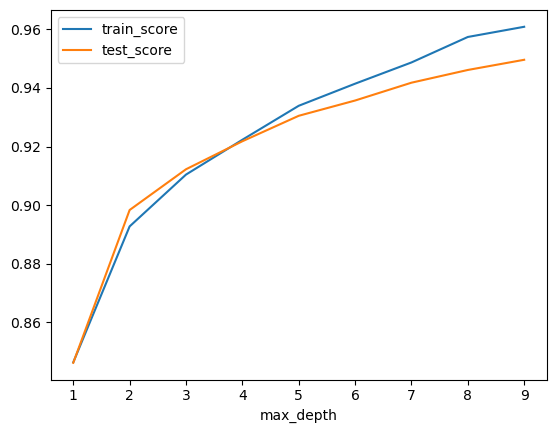

In [21]:
models_df.plot(x='max_depth')